In [ ]:
try:
    import mrcfile, gemmi, numpy, pandas, IPython, matplotlib, ipywidgets, plotly, skimage, scipy, requests

except ImportError:
    !pip install mrcfile gemmi pandas IPython matplotlib ipywidgets plotly scikit-image


%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual

# Change width of the cells
from IPython.display import HTML, display
display(HTML("<style>.container { width:80% !important; }</style>"))

if not os.path.exists('cryoem_notebook_lib.py'):
    import requests
    URL = "https://instagram.com/favicon.ico"
    response = requests.get(URL)
    open("cryoem_notebook_lib.py", "wb").write(response.content)
    
from cryoem_notebook_lib import *

# Plot recording time of the micrographs

In [ ]:
data_folder = "f:\linux\\relion40_tutorial_precalculated_results\\"
img_paths = glob.glob('f:\linux\\relion40_tutorial_precalculated_results\MotionCorr\job002\Movies\*.mrc')

plot_import(data_folder, 'job001')

# MotionCorr job stats

In [ ]:
plot_motioncorr(data_folder+'//MotionCorr/job002/corrected_micrographs.star', 80)

# Live preview of micrographs after MotionCorr

In [ ]:
img_paths = glob.glob(data_folder+'MotionCorr/job002/Movies/*.mrc')

ls = []
for file in img_paths:
    if not 'PS.mrc' in file:
        ls.append(file)
img_paths = ls

p=interactive(show_mrc_fft, n=widgets.IntSlider(min=0, max=len(img_paths)-1, step=1, value=0), 
              r=(0.05,1,0.05),
             datapath={'Images paths': img_paths},
              fft=widgets.Checkbox(value=False, description='Show FFT Abs')
             )
display(p)
show_mrc_fft(n=1, r=0.5, datapath=img_paths, blur=True, filter_intensity=1)
show_mrc_fft(n=5, r=0.5, datapath=img_paths, blur=True, filter_intensity=1)
show_mrc_fft(n=10, r=0.5, datapath=img_paths, blur=True, filter_intensity=1)


In [ ]:
# CtfFind job stats

In [ ]:
ctffind = parse_star_whole(data_folder+'/CtfFind/job003/micrographs_ctf.star'.format(data_folder))

p=interactive(plot_ctf_stats,
              starctf={'Star file': ctffind},
              index=widgets.IntRangeSlider(value=[0, 100]),
              defocus=widgets.IntRangeSlider(value=[0, 100]),
              max_res = widgets.IntRangeSlider(value=[0, 100]),
              fom=widgets.IntRangeSlider(value=[0, 100]),
              save_star=False
             )
display(p)

plot_ctf_stats(ctffind, [0, 100], [0, 100], [0, 100], [0, 100], False);

# Picking preview

In [ ]:
p=interactive(plot_picks_relion, 
              n=widgets.IntSlider(min=0, max=len(img_paths)-1, step=1, value=0), 
              r=(0.05,1,0.05),
              rln_folder={'Images paths': data_folder},
              score=widgets.IntRangeSlider(value=[0, 100]),
              job_name={'Job': 'AutoPick/job006/'},
             )

display(p)

plot_picks_relion(n=2, r=1, rln_folder=data_folder, score=[0,100], job_name='AutoPick/job006/')

# Topaz training curve plotting with the hint for the best model

In [ ]:
load_topaz_curve(data_folder+'/AutoPick/job010/model_training.txt', True)

# Preview of Autopick

In [ ]:
p=interactive(plot_picks_relion, 
              n=widgets.IntSlider(min=0, max=len(img_paths)-1, step=1, value=0), 
              r=(0.05,1,0.05),
              rln_folder={'Images paths': data_folder},
              score=widgets.IntRangeSlider(value=[0, 100]),
              job_name={'Job': 'AutoPick/job011/'},
             )

display(p)

plot_picks_relion(n=2, r=1, rln_folder=data_folder, score=[0,100], job_name='AutoPick/job011/')

# Preview random extracted particles

In [ ]:
show_random_particles(data_folder, 'job012', blur=1)

# Show 2D classification results

In [ ]:
run008 = class2d_run(data_folder, 'job008')

run008.plot_all_classes()
run008.plot_stats_dist()

# Show selected classes

In [ ]:
plot_selected_classes(data_folder, 'job009')

# Show 2D classification results

In [ ]:
run013 = class2d_run(data_folder, 'job013')

run013.plot_all_classes()
run013.plot_stats_dist()

# Show selected 2D classes

In [ ]:
plot_selected_classes(data_folder, 'job014')

# Show last 3D volume projection from Initial Model

In [ ]:
project_last_volume(data_folder+'InitialModel/job015/', '*class*', 1)

In [ ]:
# Show 3D classification results

In [ ]:
run016 = class3d_run(data_folder, 'job016', 4)
run016.plot_all_classes()
run016.plot_stats_dist()
run016.plot_stats_res()
run016.plot_angles()

# Show mask

In [ ]:
project_last_volume(data_folder+'MaskCreate/job020/', '*mask*', 1)

# Show Refine3D job results

In [ ]:
run019 = refine3d_run(data_folder, 'job019')
run019.plot_all_classes()
run019.plot_stats_res()
run019.plot_angles()

# Plot FSC and masked volume from PostProcess job

In [ ]:
plot_postprocess(data_folder, 'job021', dpi=100, res_ticks=(2.5, 3.0, 3.3, 4, 5, 7, 10, 20, 75))

In [ ]:
project_last_volume(data_folder+'PostProcess/job021/', '*masked*', 1)

# Show CtfRefine plots

In [ ]:
plot_ctf_refine(data_folder, 'job022')

In [ ]:
plot_ctf_refine(data_folder, 'job023')

In [ ]:
plot_ctf_refine(data_folder, 'job024', data_folder+'Refine3D/job019/run_data.star')

# Plot new Refine3D results

In [ ]:
run025 = refine3d_run(data_folder, 'job025')
run025.plot_all_classes()
run025.plot_stats_res()
run025.plot_angles()

In [ ]:
plot_locres(data_folder, 'job031', mask_job='job020')

['f:\\linux\\relion40_tutorial_precalculated_results\\MaskCreate/job020\\mask.mrc']


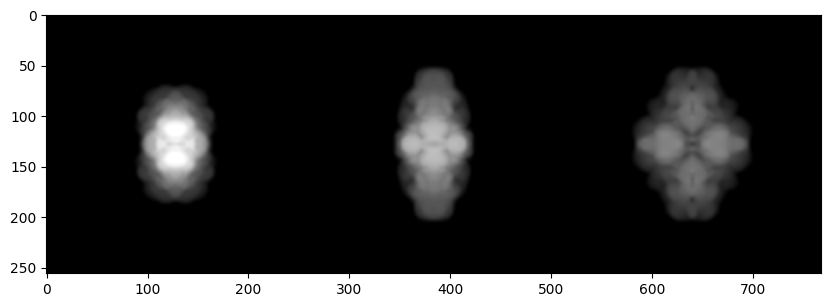

In [35]:
project_last_volume(data_folder+'MaskCreate/job020/', '*mask*', 1)

# Show Refine3D job results

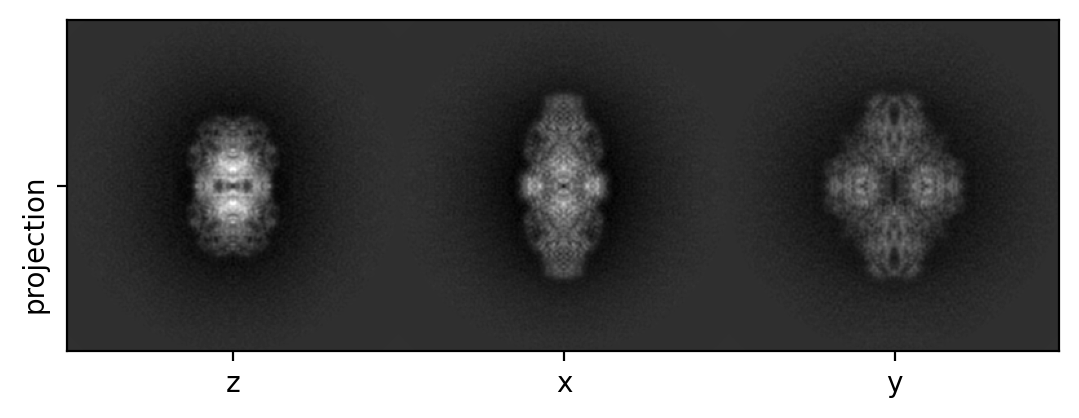

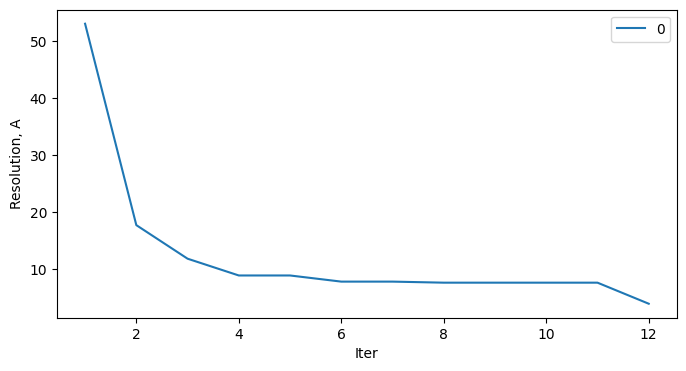

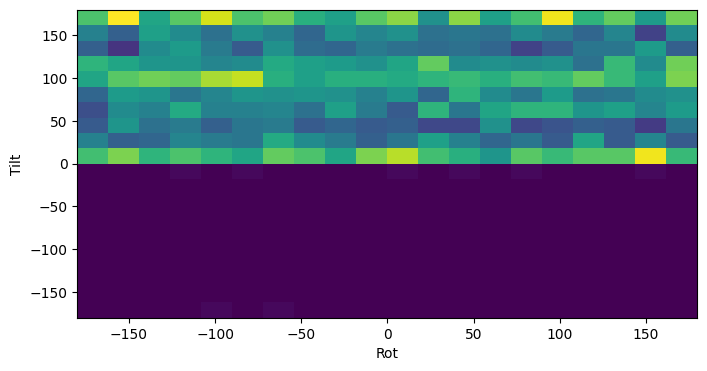

In [43]:
run019 = refine3d_run(data_folder, 'job019')
run019.plot_all_classes()
run019.plot_stats_res()
run019.plot_angles()

# Plot FSC and masked volume from PostProcess job

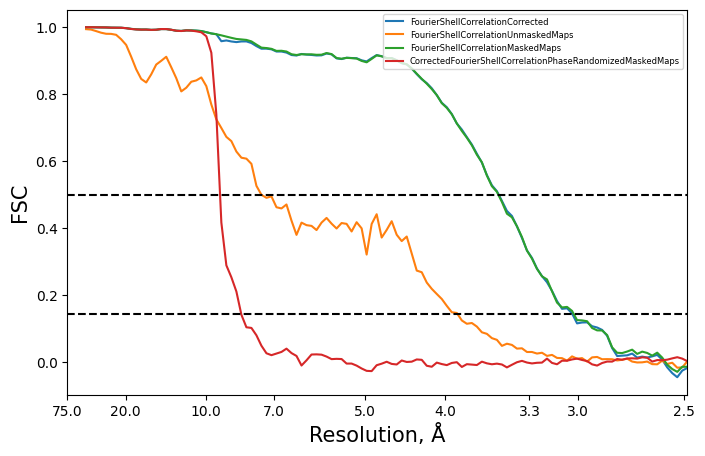

In [68]:
plot_postprocess(data_folder, 'job021', dpi=100, res_ticks=(2.5, 3.0, 3.3, 4, 5, 7, 10, 20, 75))

['f:\\linux\\relion40_tutorial_precalculated_results\\PostProcess/job021\\postprocess_masked.mrc']


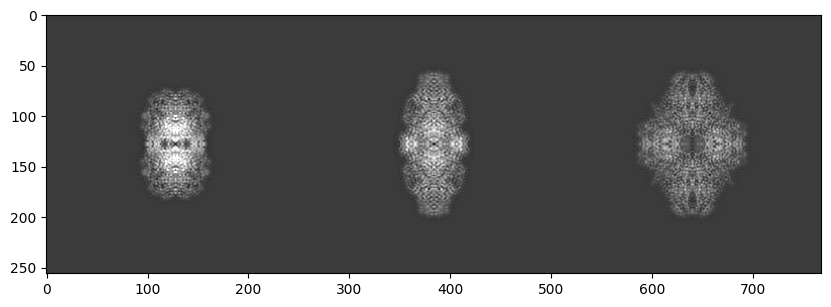

In [69]:
project_last_volume(data_folder+'PostProcess/job021/', '*masked*', 1)

# Show CtfRefine plots

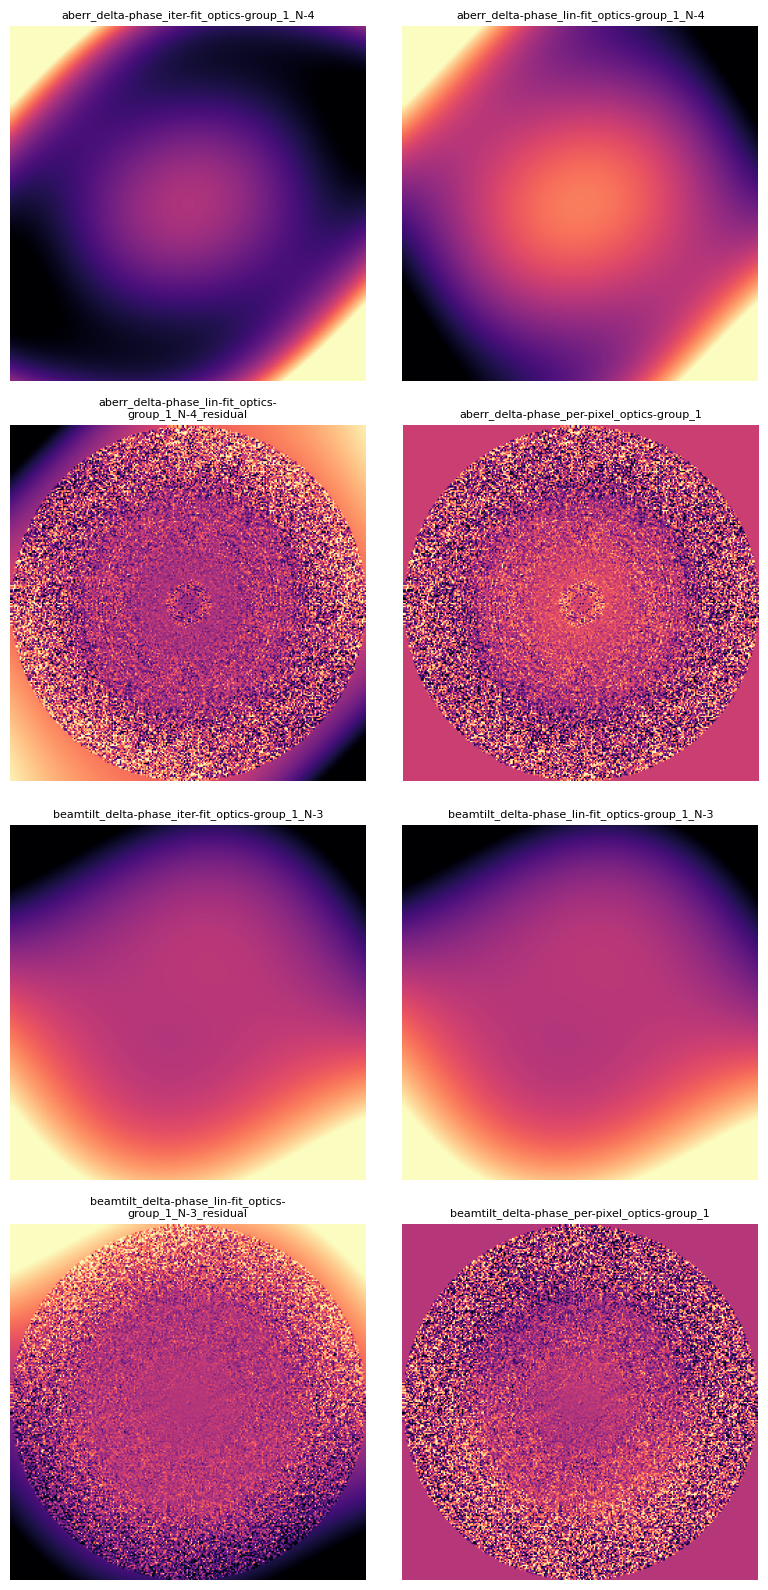

In [157]:
plot_ctf_refine(data_folder, 'job022')

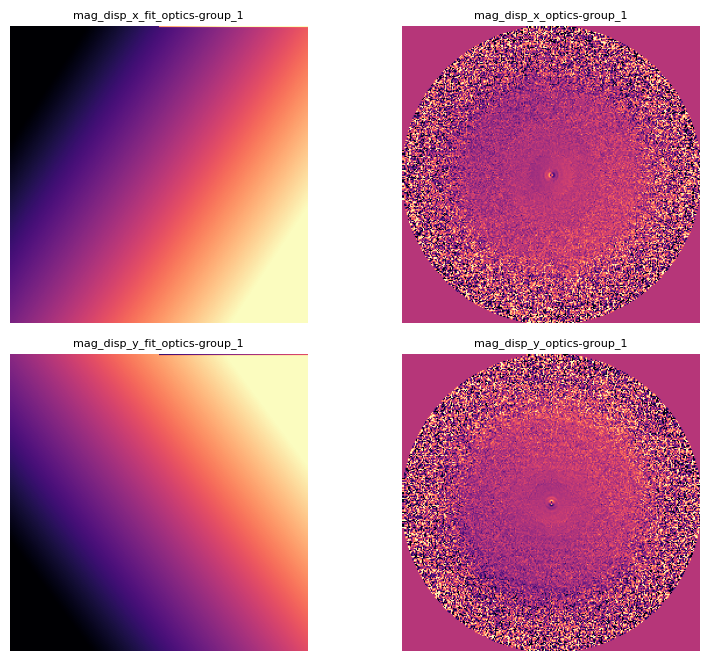

In [194]:
plot_ctf_refine(data_folder, 'job023')

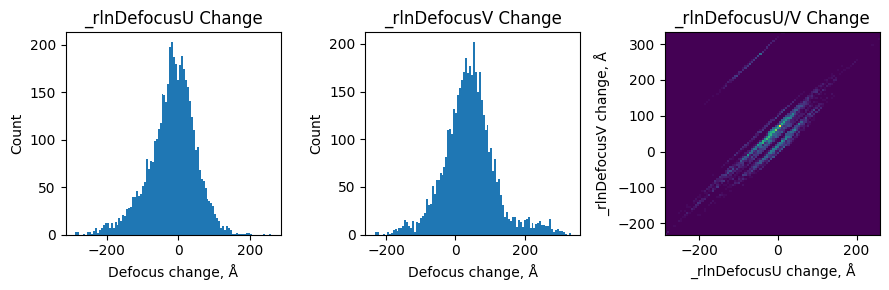

In [193]:
plot_ctf_refine(data_folder, 'job024', data_folder+'Refine3D/job019/run_data.star')

# Plot new Refine3D results

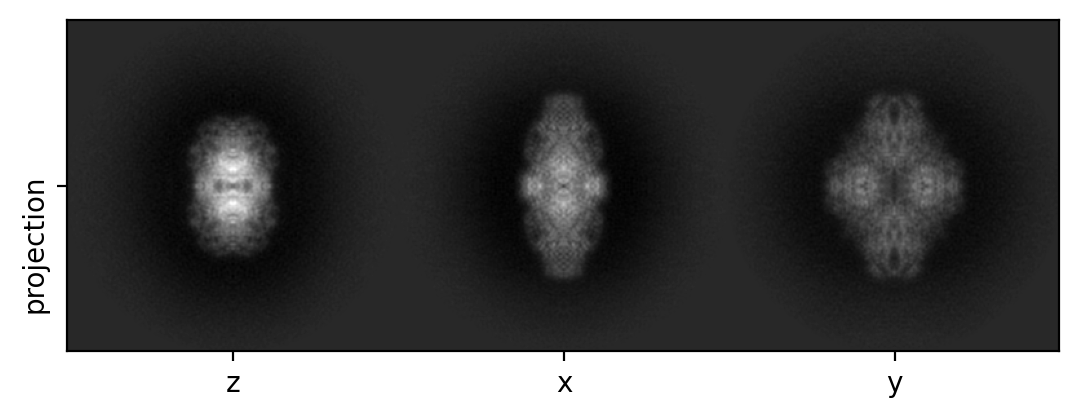

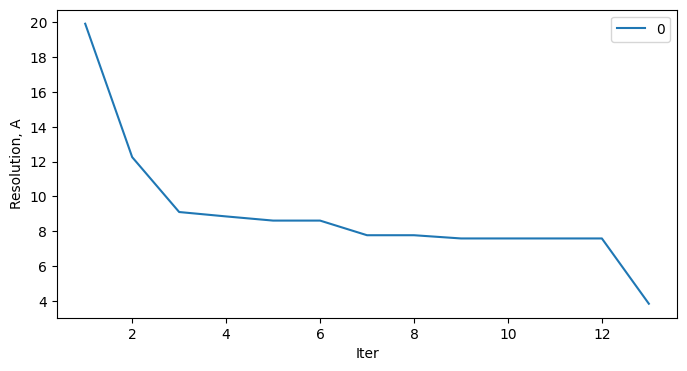

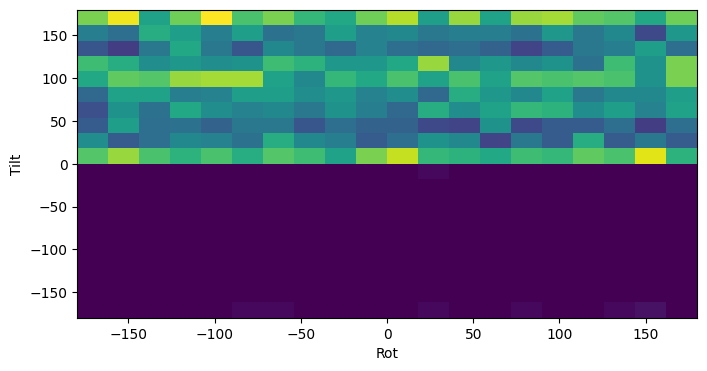

In [195]:
run025 = refine3d_run(data_folder, 'job025')
run025.plot_all_classes()
run025.plot_stats_res()
run025.plot_angles()

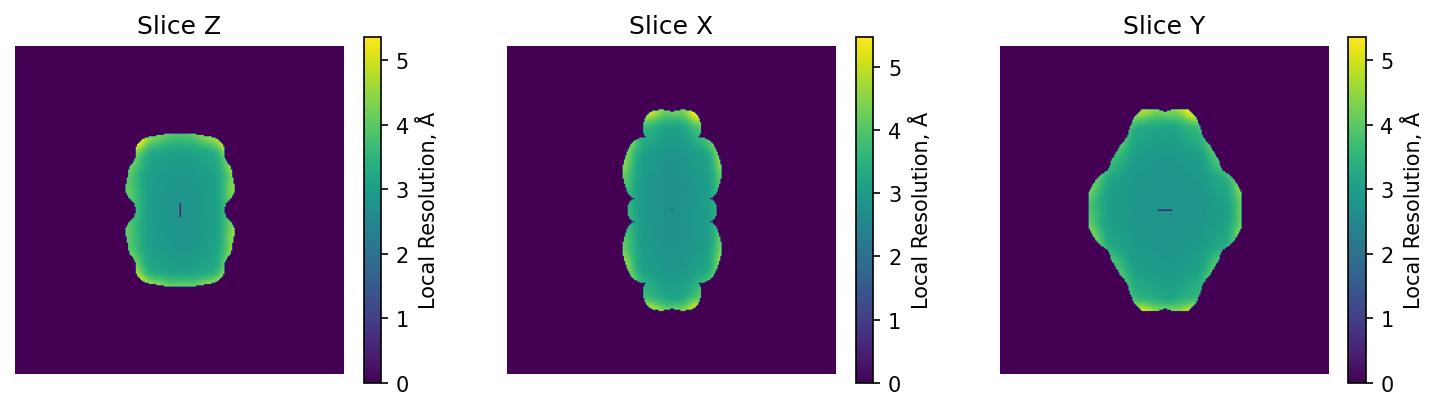

In [215]:
plot_locres(data_folder, 'job031', mask_job='job020')